### Purpose:
* This notebook will serve as a submission for the EDA of the dataset
* The dataset was pulle from the Protein Data Bank Archive
* https://www.rcsb.org/
* The data contains bioloigcal molecules, not just proteins, as well as other metrics such as moleculare weight, crystalization temp, and density in solution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
proteins = pd.read_csv("proteins_1.csv",index_col=0).reset_index()

In [40]:
proteins.head()

,index,structureId,chainId,sequence,residueCount,macromoleculeType,classification,experimentalTechnique,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,OXYGEN TRANSPORT,X-RAY DIFFRACTION,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
1,7,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
2,8,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,OXYGEN TRANSPORT,X-RAY DIFFRACTION,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,11,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0
4,12,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,OXYGEN TRANSPORT,X-RAY DIFFRACTION,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0


In [41]:
proteins.shape

(346325, 17)

### What are column names are present?

In [42]:
for col in proteins.columns:
    print(col)

index
structureId
chainId
sequence
residueCount
macromoleculeType
classification
experimentalTechnique
resolution
structureMolecularWeight
crystallizationMethod
crystallizationTempK
densityMatthews
densityPercentSol
pdbxDetails
phValue
publicationYear


### Lets take a look at the null values present in the data?

In [43]:
proteins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346325 entries, 0 to 346324
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   index                     346325 non-null  int64  
 1   structureId               346325 non-null  object 
 2   chainId                   346323 non-null  object 
 3   sequence                  346322 non-null  object 
 4   residueCount              346325 non-null  int64  
 5   macromoleculeType         346325 non-null  object 
 6   classification            346324 non-null  object 
 7   experimentalTechnique     346325 non-null  object 
 8   resolution                330232 non-null  float64
 9   structureMolecularWeight  346325 non-null  float64
 10  crystallizationMethod     240597 non-null  object 
 11  crystallizationTempK      243934 non-null  float64
 12  densityMatthews           307481 non-null  float64
 13  densityPercentSol         307615 non-null  f

Text(0.5, 1.0, 'Percent Missing values')

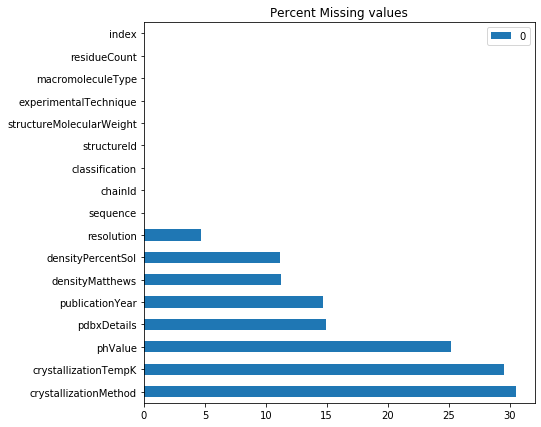

In [45]:
pd.DataFrame((proteins.isna().sum(axis=0) / proteins.shape[0]*100)).sort_values(by =0, ascending=False).plot.barh(figsize=(7,7
                                                                                                                          ))
plt.title('Percent Missing values')

For the project, I will be needing only the sequences, so I can disregard everything else

### How many unique classifcations of proteins are there?

In [49]:
len(pd.DataFrame(proteins['classification'].value_counts()))

4468

Depending on how deep the classification problem should be, this could be a 4468 clasification problem or I could just pick a few. Or I could try to find similar ones and bunch them together. I think going forward I may want to pick 20 or so, and create a classifiier from that. Here are the top 20 protein classes by count

In [48]:
pd.DataFrame(proteins['classification'].value_counts()).head(20)

,classification
HYDROLASE,46336
TRANSFERASE,36424
OXIDOREDUCTASE,34322
IMMUNE SYSTEM,15615
LYASE,11682
HYDROLASE/HYDROLASE INHIBITOR,11218
TRANSCRIPTION,8919
VIRAL PROTEIN,8495
TRANSPORT PROTEIN,8371
VIRUS,6972


### I was curious to see how many proteins were added to the database by year.

In [50]:
values = list(proteins['publicationYear'].value_counts())
indices = proteins['publicationYear'].value_counts().index
proteins_in_years = pd.DataFrame(indices,columns=['Year'])
proteins_in_years['Values'] = values
proteins_in_years.sort_values(by='Year',inplace=True,ascending=True)
proteins_in_years

,Year,Values
47,201.0,2
49,1969.0,1
46,1970.0,3
48,1971.0,1
43,1972.0,8
45,1974.0,7
40,1975.0,12
39,1976.0,20
41,1977.0,11
44,1978.0,7


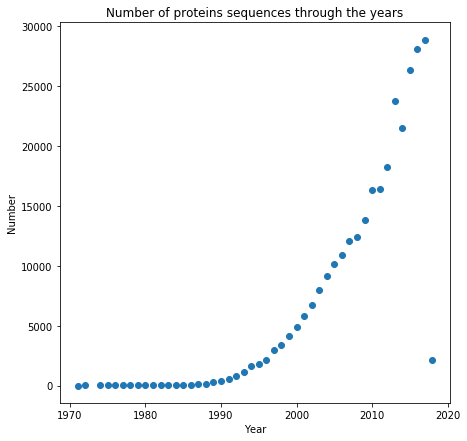

In [53]:
plt.figure(figsize=(7,7))
plt.scatter(proteins_in_years['Year'][proteins_in_years['Year'] > 1970] ,
         proteins_in_years['Values'][proteins_in_years['Year'] > 1970])
plt.title("Number of proteins sequences through the years")
plt.xlabel('Year')
plt.ylabel("Number")
plt.show()

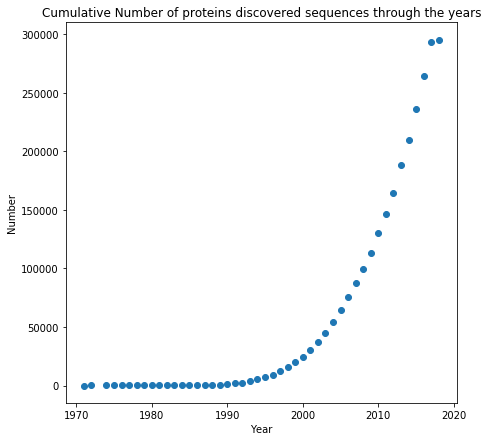

In [52]:
plt.figure(figsize=(7,7))
plt.scatter(proteins_in_years['Year'][proteins_in_years['Year'] > 1970] ,
         np.cumsum(proteins_in_years['Values'][proteins_in_years['Year'] > 1970]))
plt.title("Cumulative Number of proteins discovered sequences through the years")
plt.xlabel('Year')
plt.ylabel("Number")
plt.show()

### What are the the distribution of amino acid lengths for proteins?
* First drop the NaN's present in the sequences column

In [60]:
len(proteins) - sum(proteins['sequence'].notnull())

3

There were only three missing, that's not bad! Let's go ahead and drop them.

In [61]:
len(proteins)
proteins = proteins[proteins['sequence'].notnull()]
len(proteins)

346322

In [62]:
lengths_of_seqs = []
for i in range(0,proteins.shape[0]):
    lengths_of_seqs.append(len(proteins['sequence'].iloc[i]))
proteins['num_residues'] = lengths_of_seqs

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


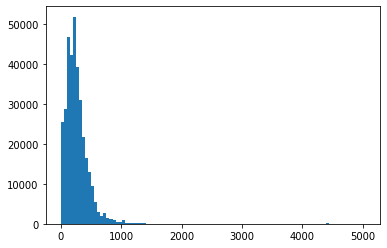

In [63]:
plt.hist(lengths_of_seqs,bins=100)
plt.show()

Most protein sequences do not exceed a length of more than 1000. Let's take a look at what those are


In [132]:
proteins[proteins['residueCount'] > 1000]['classification'].value_counts()

OXIDOREDUCTASE                        20822
HYDROLASE                             19813
TRANSFERASE                           15621
HYDROLASE/HYDROLASE INHIBITOR          6666
LYASE                                  6421
                                      ...  
Actin binding Protein                     2
ANTIVIRAL PROTEIN, HYDROLASE              2
TRANSFERASE, HYDROLASE/TRANSLATION        2
HYDROLASE,PROTEIN TRANSPORT               1
TRANSLATION,TRANSFERASE                   1
Name: classification, Length: 1269, dtype: int64

### Does this distrbution compare to the other classes of proteins?
* Since there are more than 4000 classes, lets just pick the top 15 or so and compare them

In [64]:
top_15 = list(proteins['classification'].value_counts()[:15].index)
top_15

['HYDROLASE',
 'TRANSFERASE',
 'OXIDOREDUCTASE',
 'IMMUNE SYSTEM',
 'LYASE',
 'HYDROLASE/HYDROLASE INHIBITOR',
 'TRANSCRIPTION',
 'VIRAL PROTEIN',
 'TRANSPORT PROTEIN',
 'VIRUS',
 'SIGNALING PROTEIN',
 'ISOMERASE',
 'LIGASE',
 'MEMBRANE PROTEIN',
 'PROTEIN BINDING']

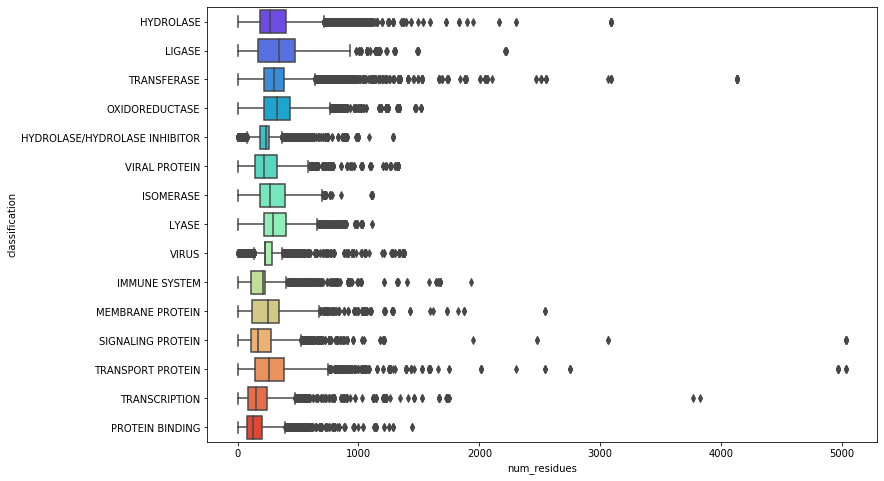

In [67]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxplot(y="classification", x="num_residues",
                 data=proteins[proteins['classification'].isin(top_15)], palette="rainbow")



In [65]:
proteins[proteins['classification'].isin(top_15)]

,index,structureId,chainId,sequence,residueCount,macromoleculeType,classification,experimentalTechnique,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,num_residues
27,67,117E,A,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,572,Protein,HYDROLASE,X-RAY DIFFRACTION,2.15,65203.21,NaN,NaN,2.71,54.69,"17-19% MPD, 25 MM MES, PH 6.0, 1 MM MNCL2, 0.5...",6.0,1998.0,286
28,68,117E,B,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,572,Protein,HYDROLASE,X-RAY DIFFRACTION,2.15,65203.21,NaN,NaN,2.71,54.69,"17-19% MPD, 25 MM MES, PH 6.0, 1 MM MNCL2, 0.5...",6.0,1998.0,286
31,74,11AS,A,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...,660,Protein,LIGASE,X-RAY DIFFRACTION,2.50,73530.97,NaN,NaN,2.30,47.00,PROTEIN CRYSTALLIZED FROM 45% SATURATED AMMONI...,7.5,1998.0,330
32,75,11AS,B,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...,660,Protein,LIGASE,X-RAY DIFFRACTION,2.50,73530.97,NaN,NaN,2.30,47.00,PROTEIN CRYSTALLIZED FROM 45% SATURATED AMMONI...,7.5,1998.0,330
33,76,11BA,A,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,248,Protein,HYDROLASE,X-RAY DIFFRACTION,2.06,28700.28,NaN,NaN,2.48,50.36,pH 4.8,4.8,1998.0,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346297,471118,9JDW,A,STQAATASSRNSCAADDKATEPLPKDCPVSSYNEWDPLEEVIVGRA...,386,Protein,TRANSFERASE,X-RAY DIFFRACTION,2.50,44444.61,NaN,NaN,3.83,68.00,pH 7.0,7.0,1999.0,386
346302,471123,9LPR,A,ANIVGGIEYSINNASLCSVGFSVTRGATKGFVTAGHCGTVNATARI...,203,Protein,HYDROLASE/HYDROLASE INHIBITOR,X-RAY DIFFRACTION,2.20,20455.54,NaN,NaN,2.50,50.88,NaN,NaN,1991.0,198
346303,471124,9LPR,P,XAAPL,203,Protein,HYDROLASE/HYDROLASE INHIBITOR,X-RAY DIFFRACTION,2.20,20455.54,NaN,NaN,2.50,50.88,NaN,NaN,1991.0,5
346306,471130,9NSE,A,SRAPAPATPHAPDHSPAPNSPTLTRPPEGPKFPRVKNWELGSITYD...,888,Protein,OXIDOREDUCTASE,X-RAY DIFFRACTION,2.24,102350.65,NaN,NaN,2.41,50.00,pH 6.5,6.5,2000.0,444


### Encode the labels and Amino acid sequences letter
* This is getting ahead of myself for the initial EDA of the data collected
* But I will need this later!
* But first drop nan in the classifcation column

In [82]:
proteins = proteins[proteins['classification'].notnull()]
len(proteins)

346321

In [83]:
from sklearn.preprocessing import LabelBinarizer

# Transform labels to one-hot
lb = LabelBinarizer()
Y = lb.fit_transform(proteins['classification'].astype(str))

In [75]:
lb.classes_

array(['3-EPIMERASE', "5'-3' EXO/ENDO NUCLEASE", 'ACARBOSE', ...,
       'viral protein/signaling protein',
       'viral protein/transcription inhibitor', 'virus/inhibitor'],
      dtype='<U67')

In [84]:
len(lb.classes_)

4468

In [85]:
set(lb.classes_) == set(proteins['classification'].unique())

True

WOOOOHOOO! I didn't mess up!

In [87]:
Y[45].shape

(4468,)

# Note the labels are in order
* in the paper they assign, each amino acid a a number
* look up table is created, and instead of using the letter, they assign it a number

In [88]:
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

# maximum length of sequence, everything afterwards is discarded!
max_length = 1024

#create and fit tokenizer
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(proteins['sequence'])
#represent input data as word rank number sequences
X = tokenizer.texts_to_sequences(proteins['sequence'])
X = sequence.pad_sequences(X, maxlen=max_length)

Using TensorFlow backend.


In [89]:
X[67585]

array([ 0,  0,  0, ..., 11, 10, 10], dtype=int32)

### What are the total counts of each amino acid

In [90]:
tokenizer.word_counts

OrderedDict([('m', 2172049),
             ('v', 6409969),
             ('l', 8284596),
             ('s', 5862224),
             ('e', 6030895),
             ('g', 6852144),
             ('w', 1266349),
             ('q', 3477229),
             ('h', 2483484),
             ('a', 7360466),
             ('k', 5197247),
             ('d', 5228821),
             ('i', 5136489),
             ('r', 4525087),
             ('f', 3625300),
             ('p', 4281039),
             ('t', 5179201),
             ('y', 3178663),
             ('n', 3903645),
             ('c', 1276847),
             ('x', 417241),
             ('u', 72),
             ('z', 53),
             ('b', 33),
             ('o', 2)])

### Across all proteins, what are the counts of each kind of amino acid

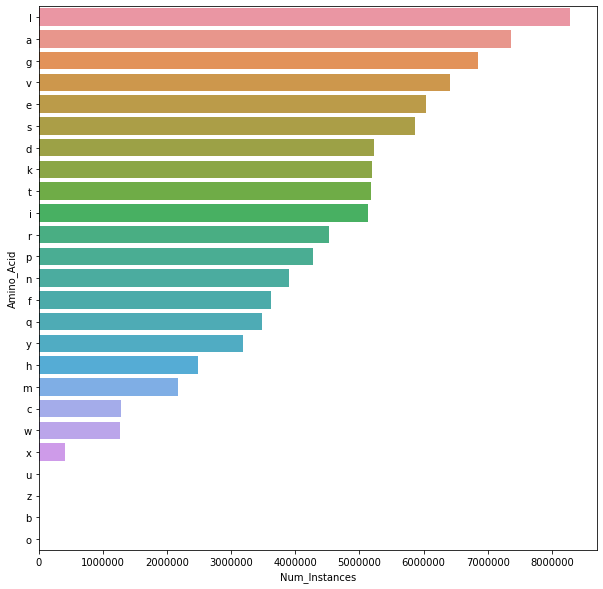

In [92]:
a = pd.DataFrame(tokenizer.word_counts.items(),columns=['Amino_Acid',
                                                        'Num_Instances']).sort_values(by='Num_Instances', ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(data=a, y='Amino_Acid',x ='Num_Instances')

### Now normalize to gain a percent?

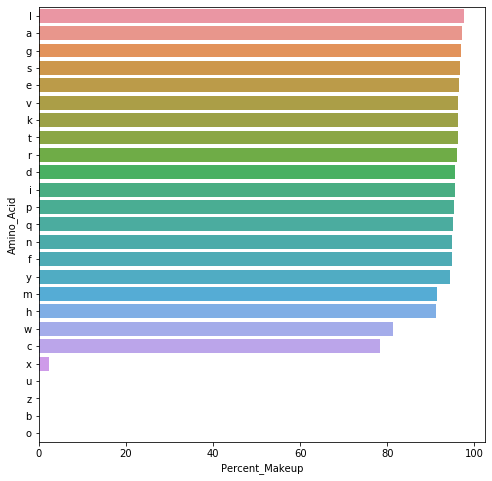

In [93]:
b = pd.DataFrame(tokenizer.word_docs.items(),columns=['Amino_Acid', 'Percent_Makeup'])
b['Percent_Makeup'] = b['Percent_Makeup'].apply(lambda x: (x/proteins.shape[0])*100)
b = b.sort_values(by= ['Percent_Makeup'],ascending = False)
plt.figure(figsize=(8,8))
sns.barplot(data=b, y='Amino_Acid', x='Percent_Makeup')

Amino acids u,x,b,z,o are not that prevalaent in protein sequences

Extra question: is there a difference in amino acid composition amoung the classes of proetins?

In [95]:
tokenizer.word_index

{'l': 1,
 'a': 2,
 'g': 3,
 'v': 4,
 'e': 5,
 's': 6,
 'd': 7,
 'k': 8,
 't': 9,
 'i': 10,
 'r': 11,
 'p': 12,
 'n': 13,
 'f': 14,
 'q': 15,
 'y': 16,
 'h': 17,
 'm': 18,
 'c': 19,
 'w': 20,
 'x': 21,
 'u': 22,
 'z': 23,
 'b': 24,
 'o': 25}

In [96]:
a = list(proteins['sequence'].iloc[5].lower())
from collections import Counter


keys  = list(Counter(a).keys()) # equals to list(set(words))
values = list(Counter(a).values())
results = np.zeros(len(tokenizer.word_index))
order_keys = list(tokenizer.word_index.keys())
#traverse order keys, 
for i in range(0,len(order_keys)):
    if order_keys[i] in keys:
        #find index
        idx1 = keys.index(order_keys[i])
        #use index to get count from values
        count = values[idx1]
        #put count in results
        results[i] = count
    else:
        results[i] = 0

In [97]:
len(results)

25

In [98]:
results

array([16., 18., 11.,  9.,  8.,  6., 10., 13., 12., 10., 13.,  3., 12.,
        5.,  5.,  6.,  1.,  5.,  0.,  3.,  0.,  0.,  0.,  0.,  0.])

In [99]:
#now into a function
def count_amino_acids(sequence):
    a = list(sequence.lower())
    keys  = list(Counter(a).keys()) # equals to list(set(words))
    values = list(Counter(a).values())
    results = np.zeros(len(tokenizer.word_index))
    order_keys = list(tokenizer.word_index.keys())
    #traverse order keys, 
    for i in range(0,len(order_keys)):
        if order_keys[i] in keys:
            #find index
            idx1 = keys.index(order_keys[i])
            #use index to get count from values
            count = values[idx1]
            #put count in results
            results[i] = count
        else:
            results[i] = 0
    #normalize results
    results = (results / np.sum(results))*100
    return(results)

In [100]:
#now apply across dataframe
all_reults = []
for i in range(0,proteins.shape[0]):
    #get the sequecne
    seq_to_examine = proteins['sequence'].iloc[i]
    #get the counts
    count_results = count_amino_acids(seq_to_examine)
    all_reults.append(count_results)

In [101]:
count_aa = pd.DataFrame(np.vstack(all_reults),columns=list(tokenizer.word_index.keys()))

In [103]:
proteins = pd.concat([proteins.reset_index(),count_aa],axis=1)

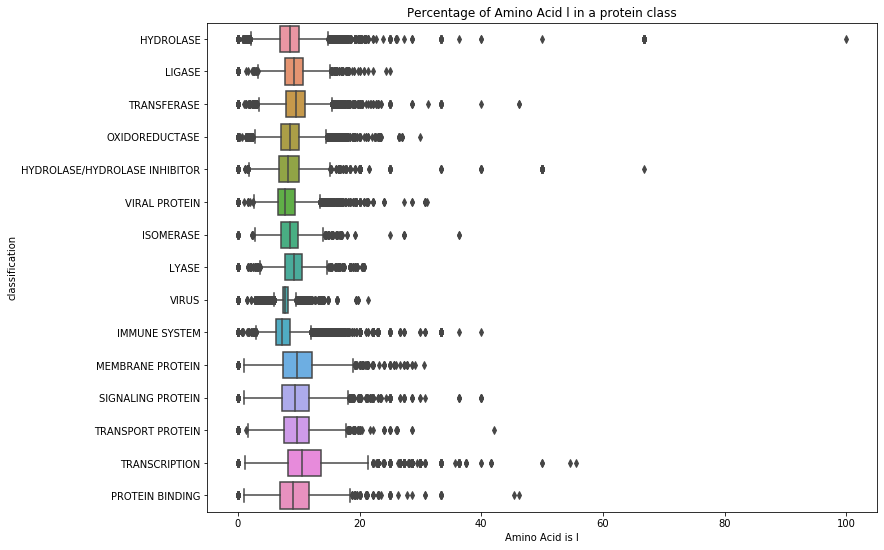

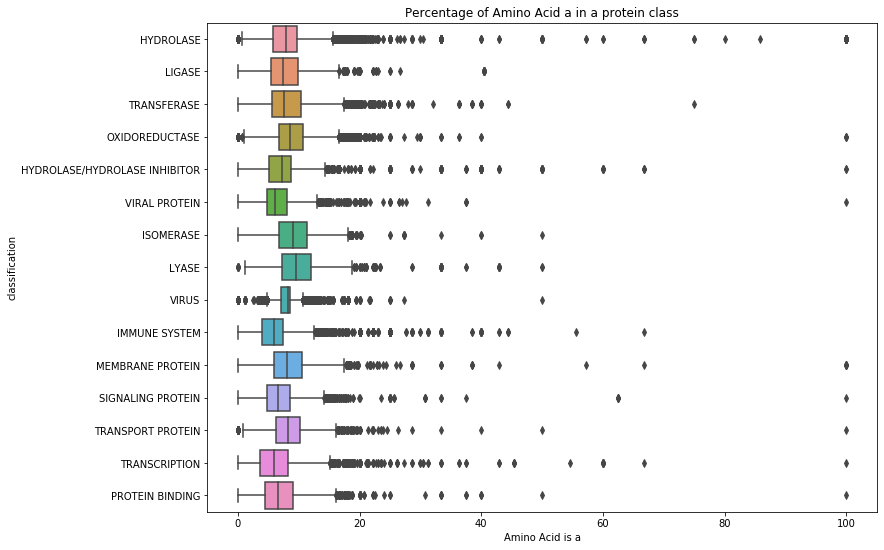

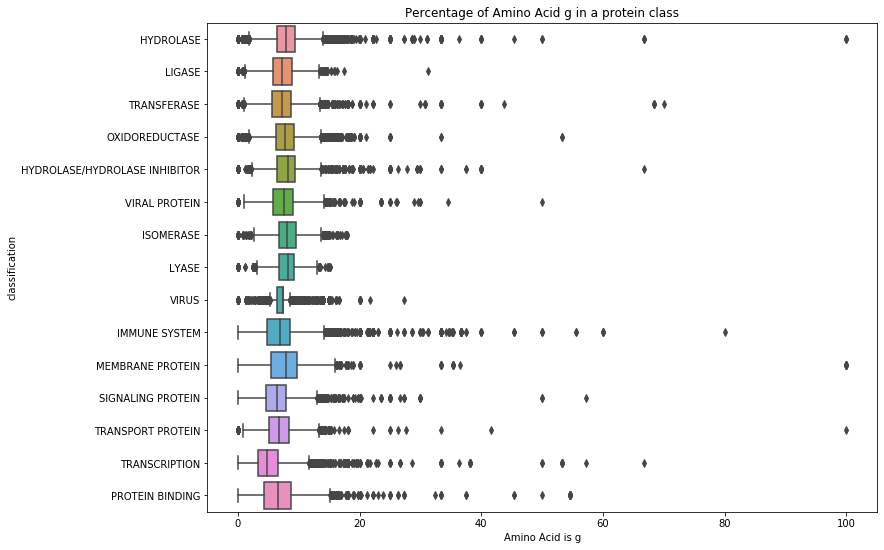

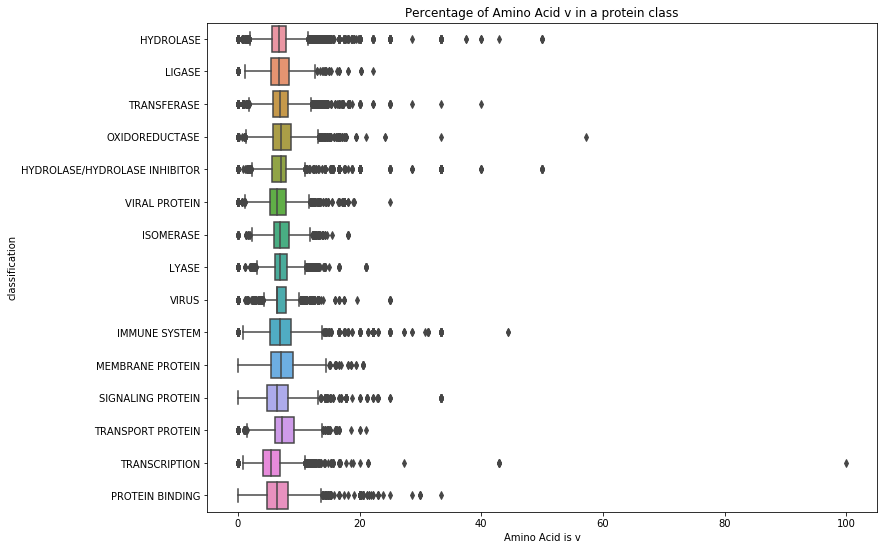

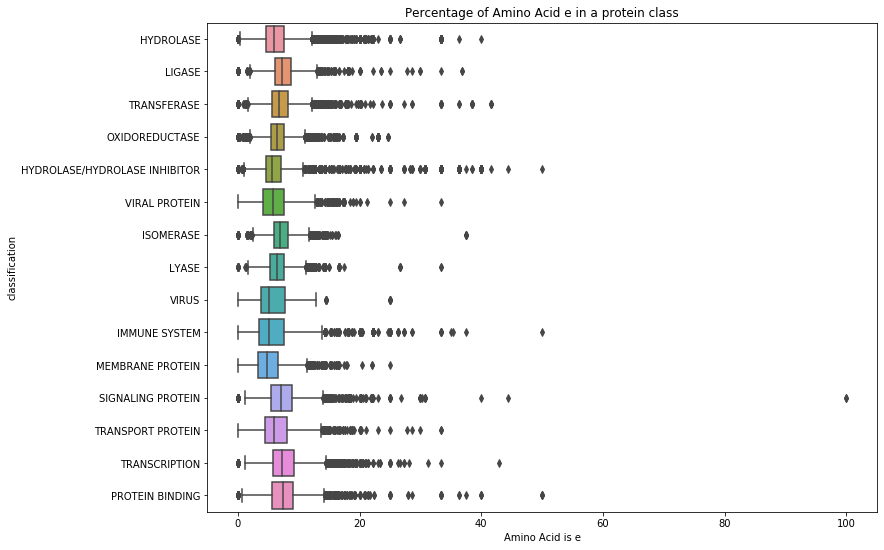

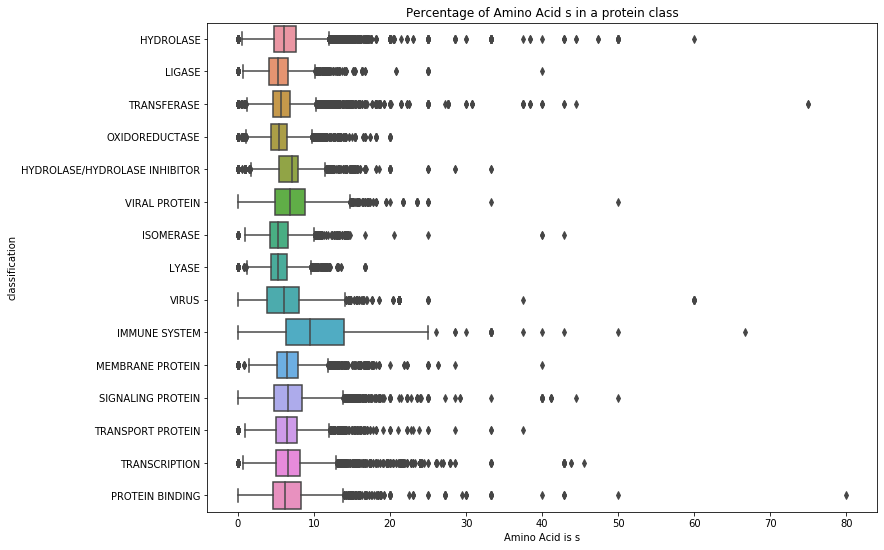

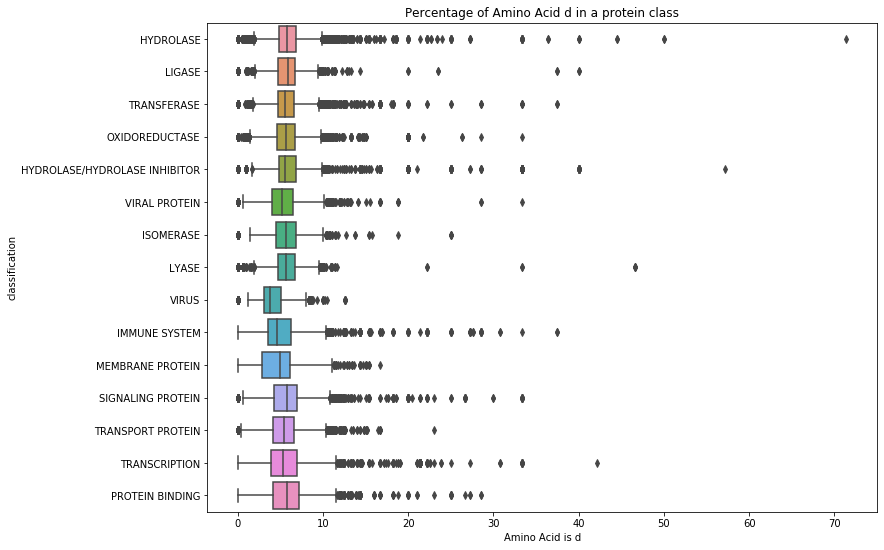

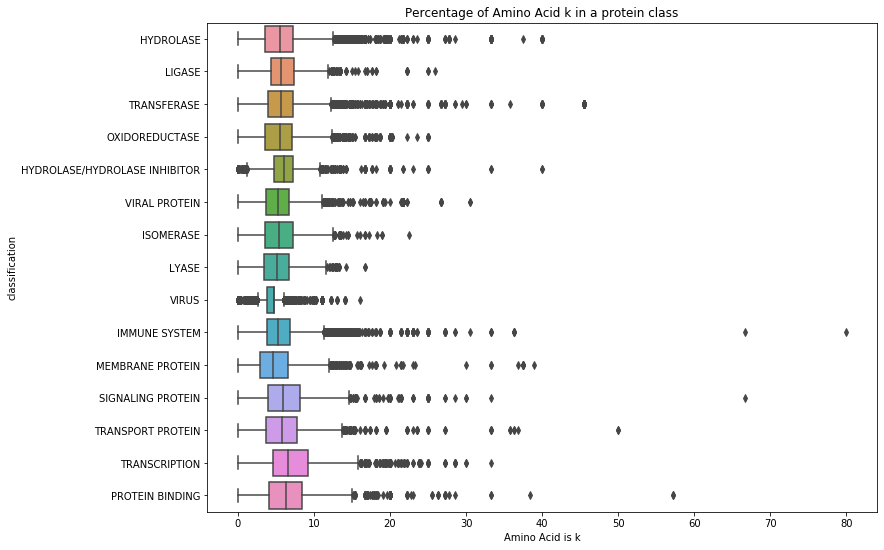

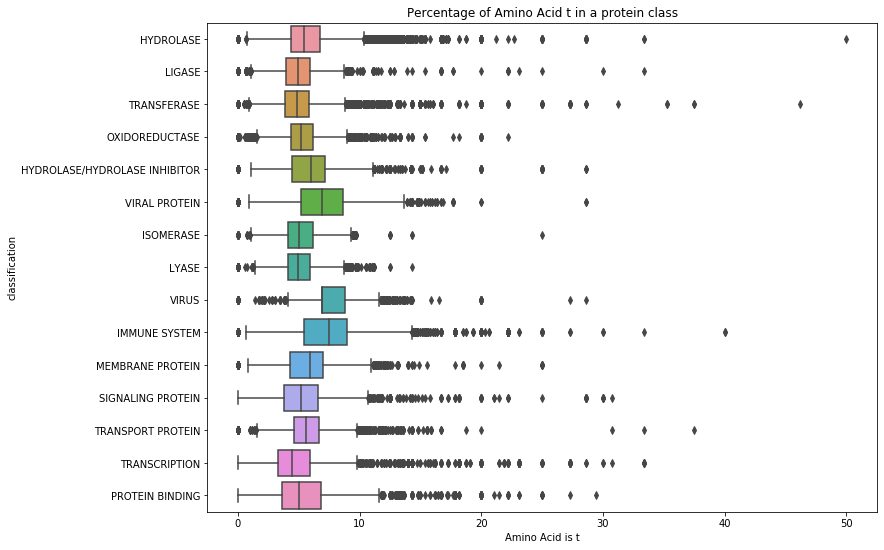

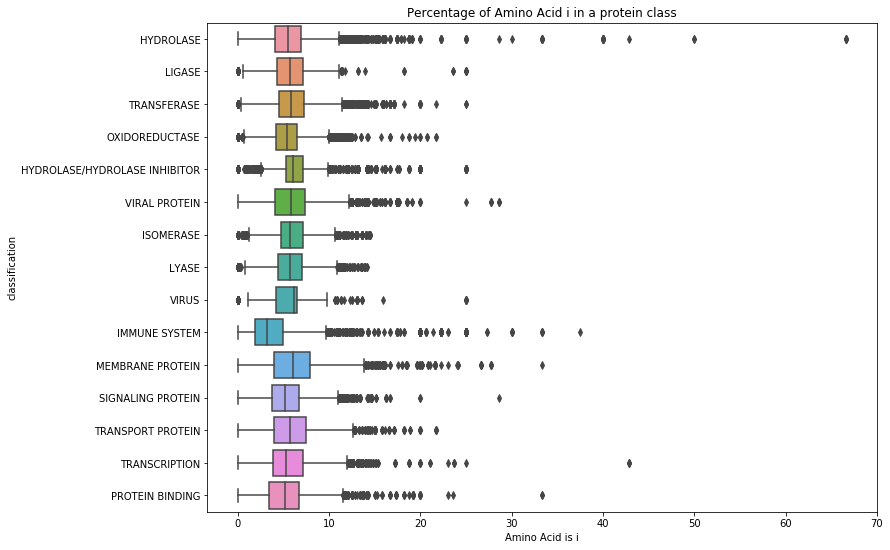

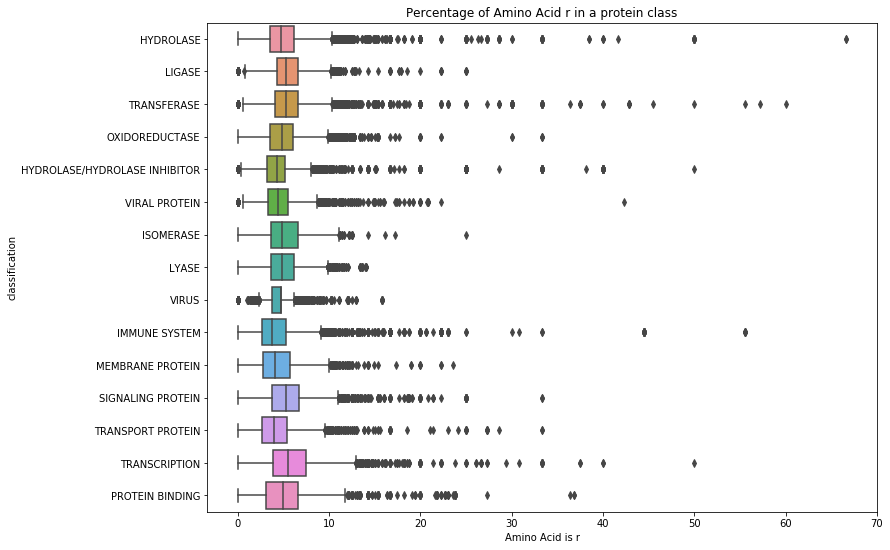

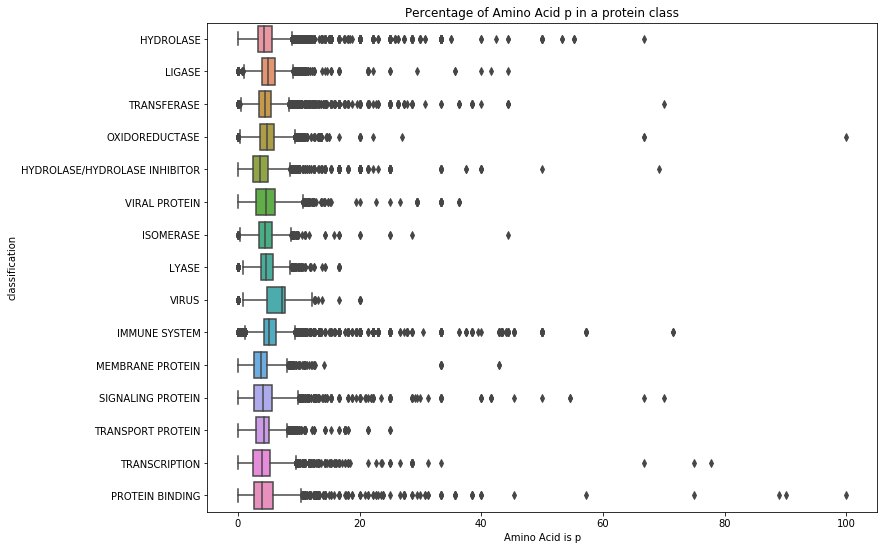

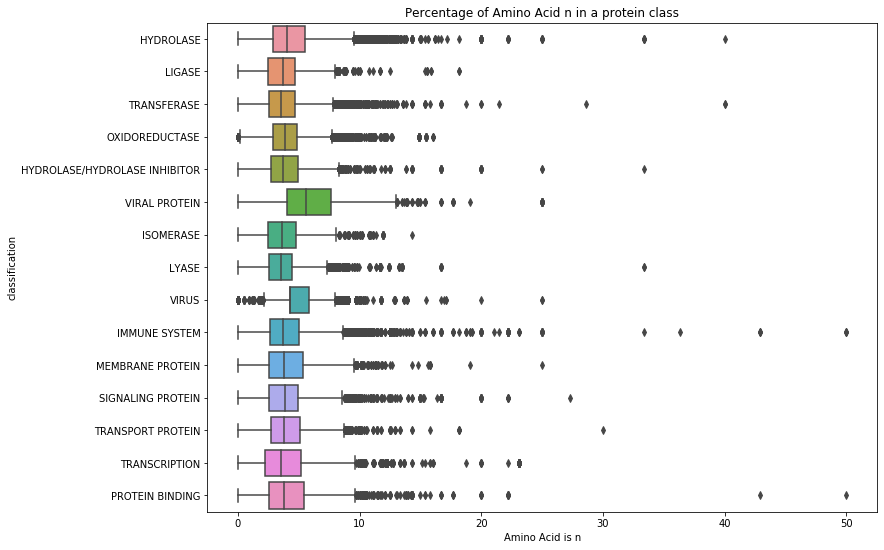

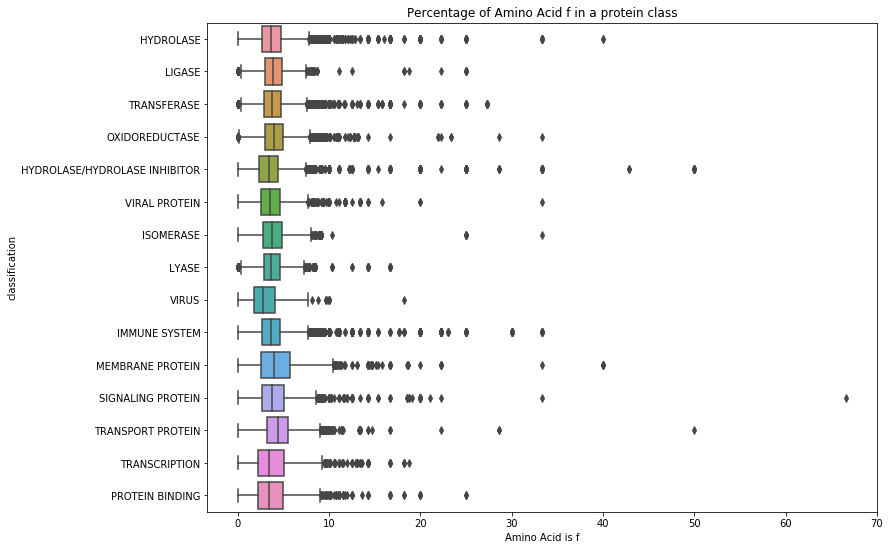

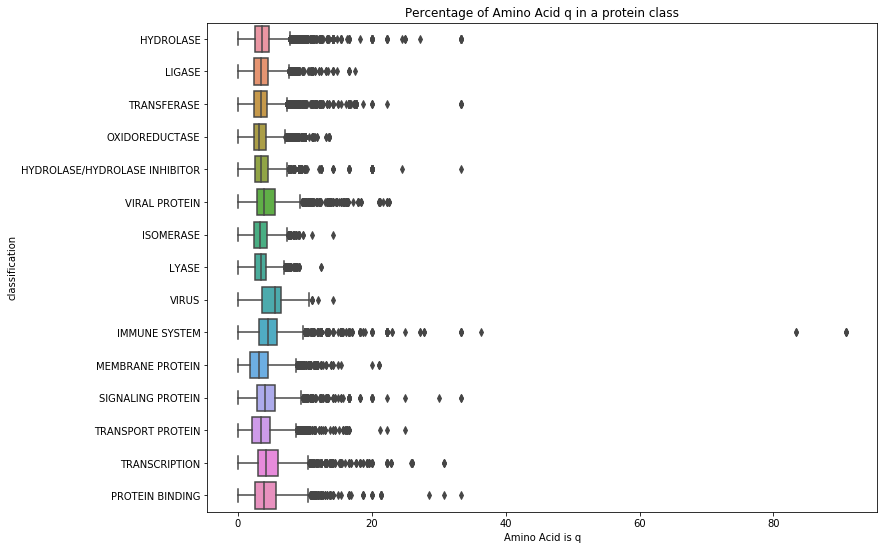

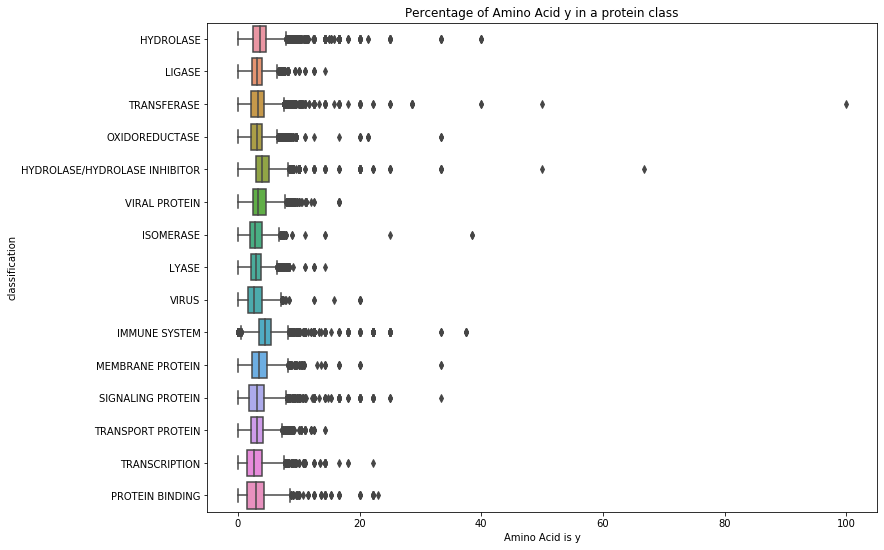

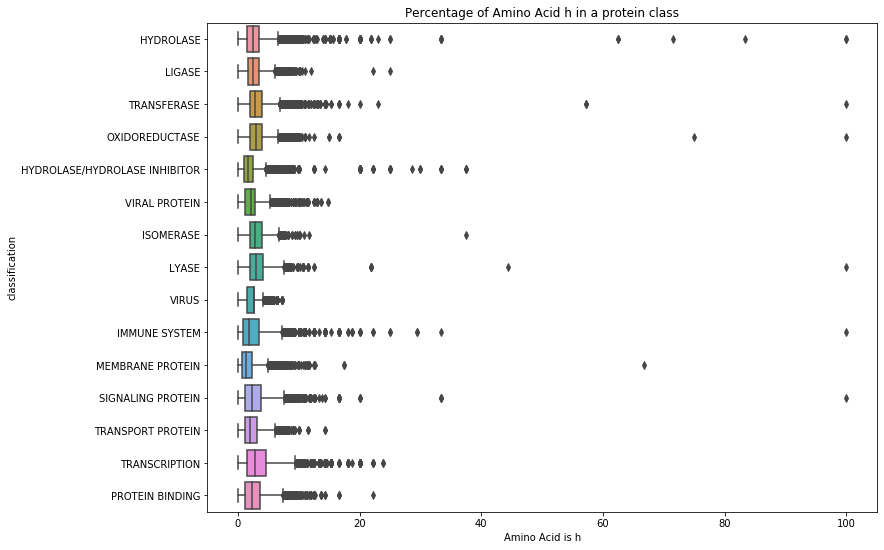

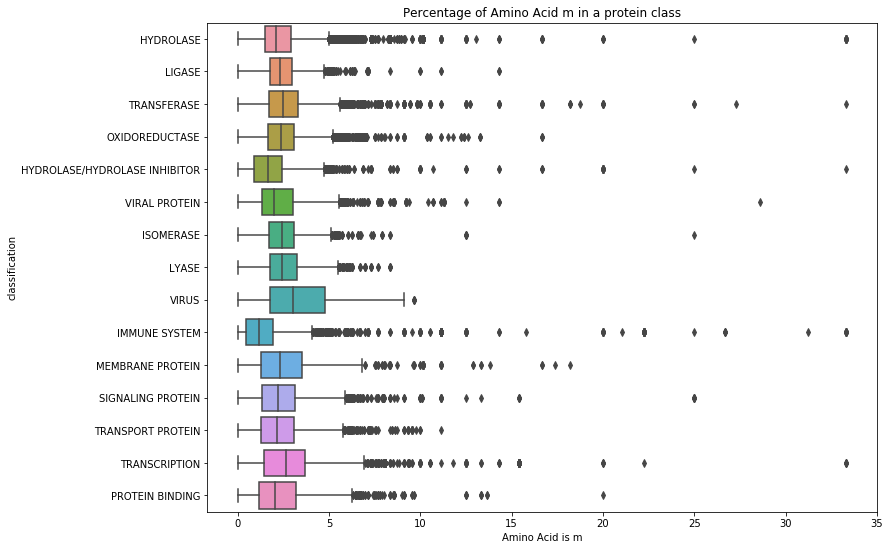

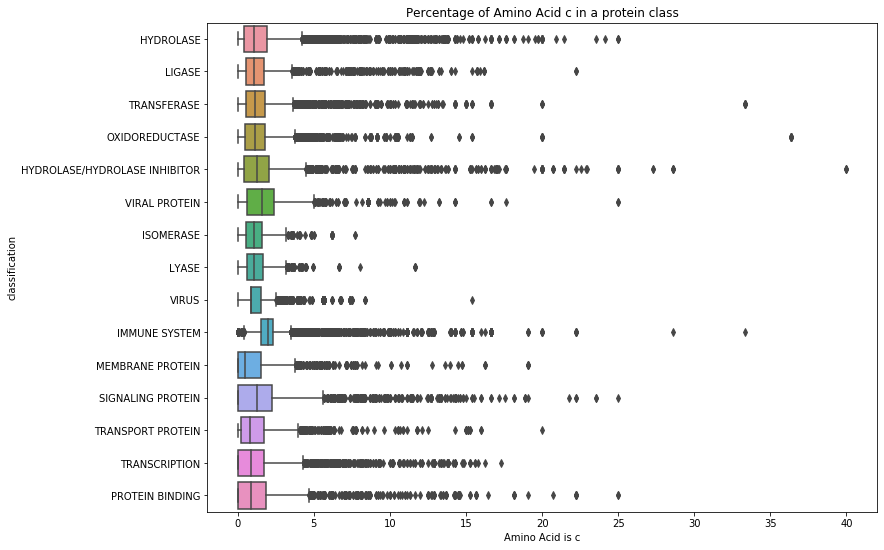

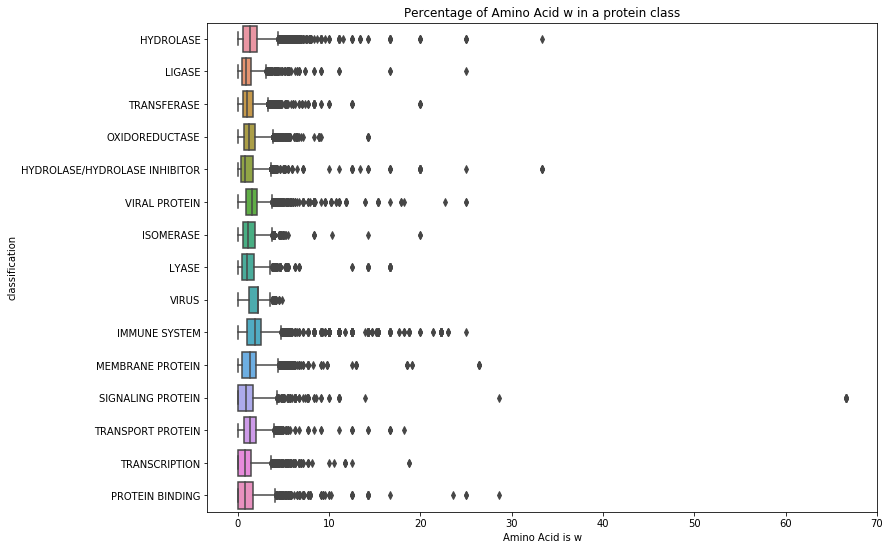

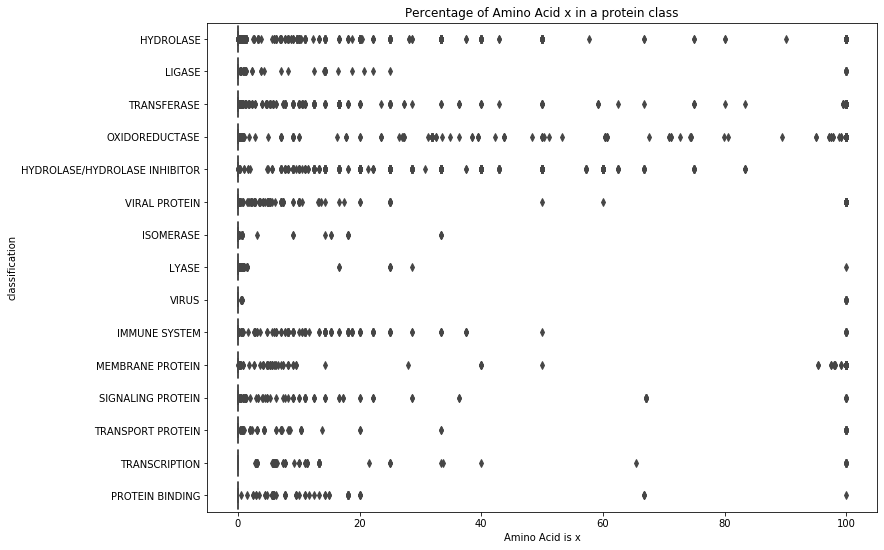

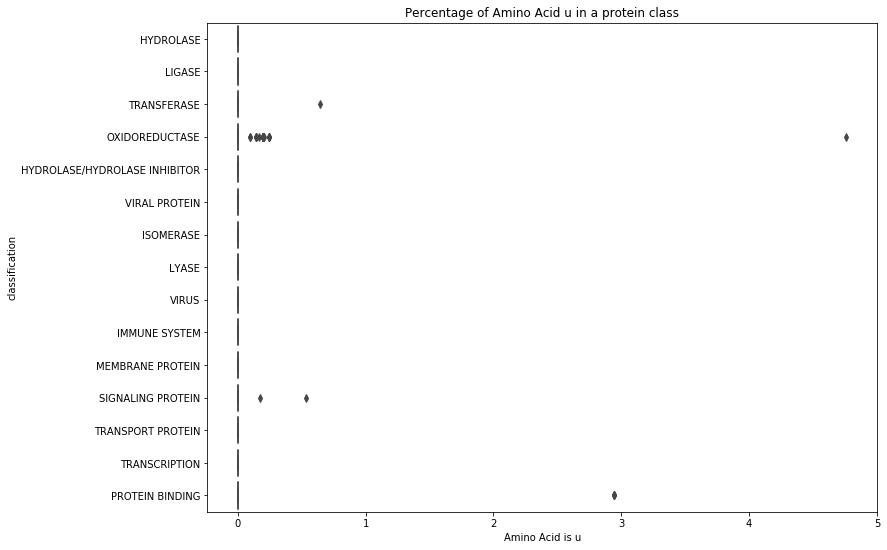

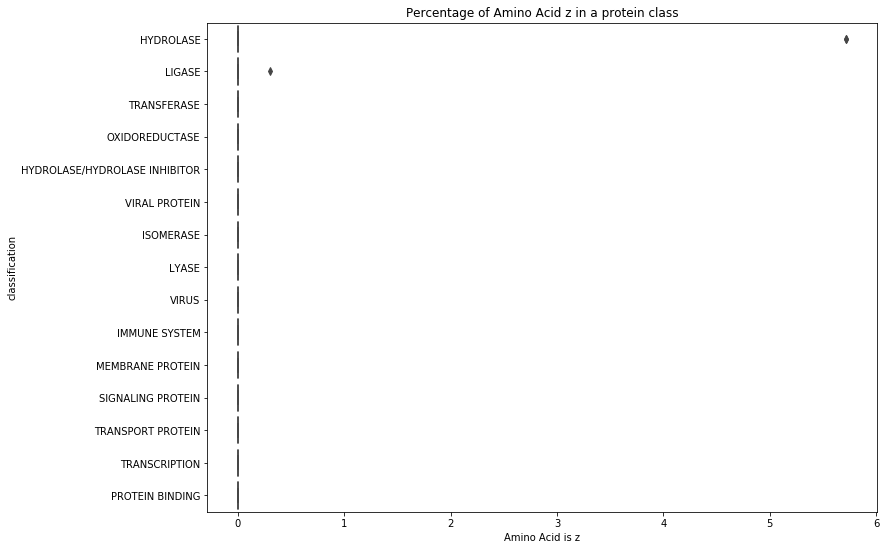

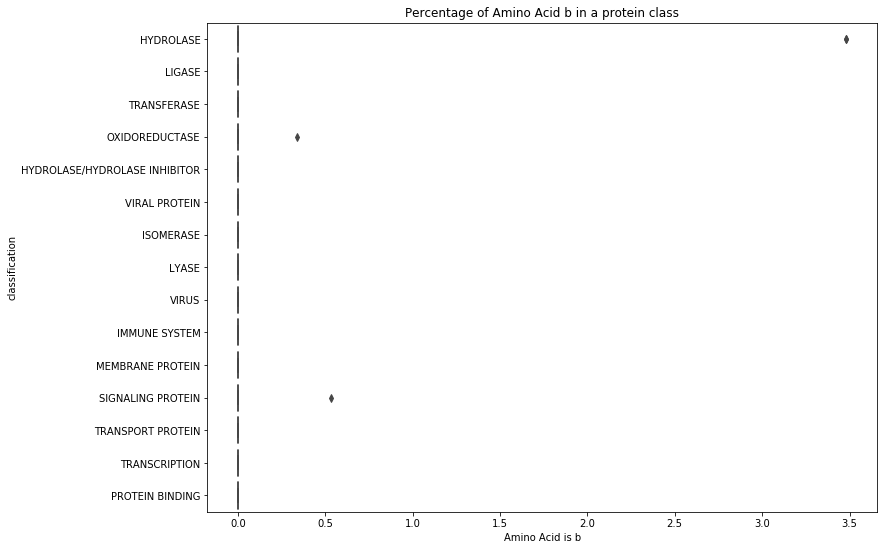

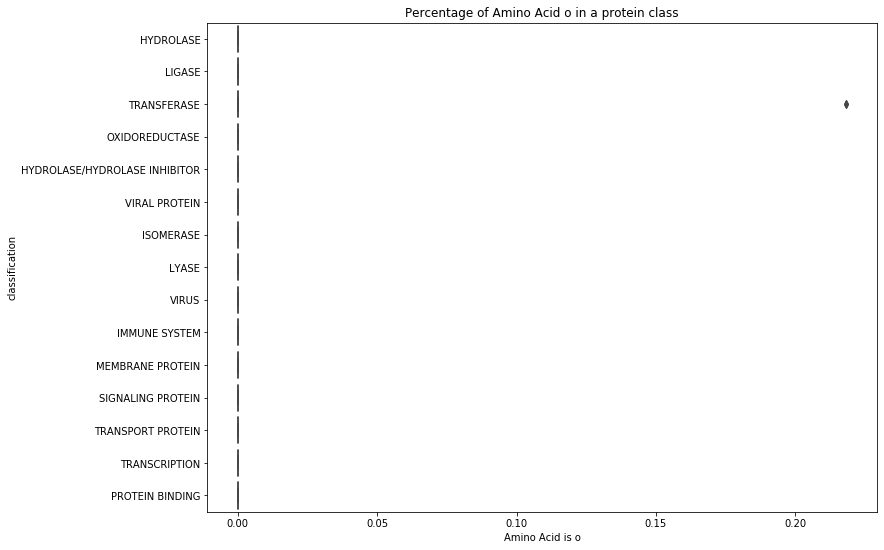

In [121]:
for a in order_keys:
    plt.figure(figsize=(12,9))
    sns.boxplot(data=proteins[proteins['classification'].isin(top_15)],
                x=a,y='classification')
    plt.xlabel('Amino Acid is '+a)
    plt.title('Percentage of Amino Acid '+ a + ' in a protein class')
    plt.show()

### To consider
* I could group a bunch of amino acids together, these are called motifs, and see if certain motifs are present in a class of proteins
* When creating a classifcation model, it might be hard trying to classify all 4468 proteins, maybe just try a few or assign a threshold and use those classes above that threshold
* intereating enough amino acids are not used as much: x, u, z, b, which correspond to  any amino acid, selenocystein, gluatamine, asparagine, 
* i thought there would be more glutamine than aspargine
